# INFO 5502 Exam 1

Please complete this notebook by filling in the cells provided. Submit both your complete notebook and a PDF to Canvas. Each question is 1 point unless specified.

In [ ]:
# Don't change this cell; just run it. 
from  google.colab import drive
drive.mount('/content/drive')
from datascience import * 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

Mounted at /content/drive


<span style='background:yellow'>**Question 1.**</span> Insert a Markdown text below this cell. The text should read:

This is my midterm exam and I am aware I must finish it all by myself. Copying from others is cheating and will result in an F for the course.

This is my midterm exam and I am aware I must finish it all by myself. Copying from others is cheating and will result in an F for the course.

<span style='background:yellow'>**Question 2.**</span> Make an array called `weird_numbers` containing the following numbers (in the given order):

1. -3
2. the cosine of 2.1
3. 5
4. 4 to the power of the sine of 4.2

*Hint:* `sin` and `cos` are functions in the `math` module.

In [ ]:
import math
weird_numbers = [-3, math.cos(2.1), 5, pow(4, math.sin(4.2))]
weird_numbers

[-3, -0.5048461045998576, 5, 0.29871642153597827]

<span style='background:yellow'>**Question 3.**</span> Write a simple function that takes in a number (weight in pounds) and returns a number which is the corresponding conversion to kg.

Test it by calling the function on 15 and 27. E.g., `convert_pounds_to_kg(15)`, `convert_pounds_to_kg(27)`. Print both to screen.

Hint: 1 pound = 0.453592 kg

In [ ]:
def convert_pounds_to_kg(number):
  weight_in_kg = number * 0.45359237
  return weight_in_kg

print(convert_pounds_to_kg(15))
print(convert_pounds_to_kg(27))

6.80388555
12.24699399


<span style='background:yellow'>**Question 4 (2 pts).**</span> We've loaded an array of temperatures in the next cell.  Each number is the highest temperature observed on a day at a climate observation station, mostly from the US.  Since they're from the US government agency [NOAA](noaa.gov), all the temperatures are in Fahrenheit.  Convert them all to Celsius by first subtracting 32 from them, then multiplying the results by $\frac{5}{9}$. Make sure to **ROUND** the final result after converting to Celsius to the nearest integer using the `np.round` function.

In [ ]:
max_temperatures = Table.read_table("/content/drive/My Drive/Colab Notebooks/temperatures.csv").column("Daily Max Temperature")
import numpy as np
f = np.array(max_temperatures)
c= np.round((5/9) * (f - 32))
print(c)

[ -4.  31.  32. ...,  17.  23.  16.]


<span style='background:yellow'>**Question 5.**</span> Suppose you have 4 apples, 3 oranges, and 5 pineapples.  (Perhaps you're using Python to solve a high school Algebra problem.)  Create a table that contains this information.  It should have two columns: `fruit name` and `count`.  Assign the new table to the variable `fruits`.

**Note:** Use lower-case and singular words for the name of each fruit, like `"apple"`.

In [ ]:

import pandas as pd

fruits = pd.DataFrame({
    'fruit name': ['apples', 'oranges', 'pineapples'],
    'count': [4, 3, 5]
})

print(fruits)

   fruit name  count
0      apples      4
1     oranges      3
2  pineapples      5


<span style='background:yellow'>**Question 6.**</span> Below we load a table containing 200,000 weekday Uber rides in the Boston, Massachusetts metropolitan area from the [Uber Movement](https://movement.uber.com) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` column contains the length of the ride, in minutes.

In [ ]:
boston = Table.read_table("/content/drive/My Drive/Colab Notebooks/boston.csv")
boston.show(4)

sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235


Produce a histogram of all ride times in Boston using the given bins. 

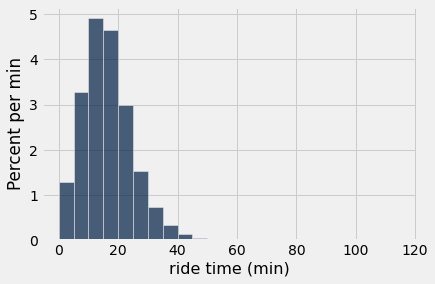

In [ ]:
equal_bins = np.arange(0, 120, 5)
boston.hist("ride time",bins = equal_bins, unit="min")

<span style='background:yellow'>**Question 7.**</span> In the next cell, we load a dataset created by the [Daily Cal](http://projects.dailycal.org/paychecker/) which contains Berkeley faculty, their departments, their positions, and their gross salaries in 2015 and solve the below question.

In [ ]:
raw_profs = Table.read_table("/content/drive/My Drive/Colab Notebooks/faculty.csv").where("year", are.equal_to(2015)).drop("year", "title")
profs = raw_profs.relabeled("title_category", "position")
profs

name,department,position,gross_salary
CYNTHIA ABAN,South & Southeast Asian Studies,lecturer,64450
PIETER ABBEEL,Computer Science,associate professor,184998
SALLY ABEL,Law,lecturer,3466
ELIZABETH ABEL,English,professor,138775
DOR ABRAHAMSON,Education,associate professor,100300
KATHRYN ABRAMS,Law,professor,319693
BARBARA ABRAMS,Public Health,professor,191162
SARAH ACCOMAZZO,Social Welfare,lecturer,14779
CHARISMA ACEY,City and Regional Planning,assistant professor,101567
DAVID ACKERLY,Biology,professor,182288


We want to use this table to generate arrays with the names of each professor in each department. Set `prof_names` to a table with two columns. The first column should be called `department` and have the name of every department once, and the second column should be called `faculty` with each row in that second column containing an *array* of the names of all faculty members in that department. 

*Hint:* Think about how ```group``` works: it collects values into an array and then applies a function to that array. We have defined two functions below for you, and you will need to use one of them in your call to ```group```.

In [ ]:
# Pick one of the two functions defined below in your call to group.
def identity(array):
    '''Returns the array that is passed through'''
    return array 

def first(array):
    '''Returns the first item'''
    return array.item(0)

# Make a call to group using one of the functions above when you define prof_names
profs.group('department', first).drop('Position first').drop('gross_salary first')
prof_name= profs.group('department', first).drop('position first').drop('gross_salary first')
prof_names = prof_name.relabeled('name first','faculty')
prof_names
# Make a call to group using one of the functions above when you define prof_nam

department,faculty
African American Studies,AYA DE LEON
Agricultural and Resource Economics and Policy,MAXIMILIAN AUFFHAMMER
Anthroplogy,SABRINA AGARWAL
Architecture,MARK ANDERSON
Art History,DILIANA ANGELOVA
Art Practice,ALLAN DESOUZA
Astronomy,GIBOR BASRI
Bioengineering,ADAM ARKIN
Biology,DAVID ACKERLY
Buddhist Studies,JANN RONIS


<span style='background:yellow'>**Question 8.**</span> **Monkeys Typing Shakespeare**


A monkey is banging repeatedly on the keys of a typewriter. Each time, the monkey is equally likely to hit any of the 26 lowercase letters of the English alphabet, 26 uppercase letters of the English alphabet, and any number between 0-9 (inclusive), regardless of what it has hit before. There are no other keys on the keyboard.  

This question is inspired by a mathematical theorem called the Infinite monkey theorem (<https://en.wikipedia.org/wiki/Infinite_monkey_theorem>), which postulates that if you put a monkey in the situation described above for an infinite time, they will eventually type out all of Shakespeare’s works.

<span style='background:yellow'>**Question 8-1.**</span> Suppose the monkey hits the keyboard 4 times.  Compute the chance that the monkey types the sequence `Data`.  (Call this `data_chance`.) Use algebra and type in an arithmetic equation that Python can evalute.

In [ ]:
data_chance = (1/62)**4 + 8*(1/62)**4
data_chance

6.090819808103984e-07

<span style='background:yellow'>**Question 8-2.**</span> Write a function called `simulate_key_strike`.  It should take **no arguments**, and it should return a random one-character string that is equally likely to be any of the 26 lower-case English letters, 26 upper-case English letters, or any number between 0-9 (inclusive). 

In [1]:
# We have provided the code below to compute a list called keys,
# containing all the lower-case English letters, upper-case English letters, and the digits 0-9 (inclusive).  Print it if you
# want to verify what it contains.
import string
import random
keys = list(string.ascii_lowercase + string.ascii_uppercase + string.digits)
def simulate_key_strike():
    return random.choice(keys)

# An example call to your function:
simulate_key_strike()

'f'

<span style='background:yellow'>**Question 8-3.**</span> Write a function called `simulate_several_key_strikes`.  It should take one argument: an integer specifying the number of key strikes to simulate. It should return a string containing that many characters, each one obtained from simulating a key strike by the monkey.

*Hint:* If you make a list or array of the simulated key strikes called `key_strikes_array`, you can convert that to a string by calling `"".join(key_strikes_array)`

In [ ]:
def simulate_several_key_strikes(num_strikes):
  key_strikes_array = [random.choice(keys) for _ in range(num_strikes)]
  return "".join(key_strikes_array)
simulate_several_key_strikes(11)

'ty36ARPlHAe'

<span style='background:yellow'>**Question 8-4.**</span> Call `simulate_several_key_strikes` 5000 times, each time simulating the monkey striking 4 keys.  Compute the proportion of times the monkey types `"Data"`, calling that proportion `data_proportion`.

In [ ]:
import random

def simulate_key_strike():
    return random.choice(keys)

def simulate_several_key_strikes(num_strikes):
    key_strikes_array = [random.choice(keys) for _ in range(num_strikes)]
    return "".join(key_strikes_array)

num_trials = 5000
num_data = 0

for i in range(num_trials):
    key_strikes = simulate_several_key_strikes(4)
    if key_strikes == "Data":
        num_data += 1

data_proportion = num_data / num_trials
print(data_proportion)


0.0


<span style='background:yellow'>**Question 8-5.**</span> Check the value your simulation computed for `data_proportion`.  Is your simulation a good way to estimate the chance that the monkey types `"Data"` in 4 strikes (the answer to question 8-1)?  Why or why not?

**SOLUTION:** The data we have was very less around 5000 records in simulation which is not sufficient to judge the probability so this we can't estimate the monkey 5th strick

<span style='background:yellow'>**Question 9.**</span> **UNT Football Season**

Let's analyze how well the UNT football team performed in a football season. A football game is divided into four periods, called quarters. The number of points UNT scored in each quarter, and the number of points their opponent scored in each quarter are stored in a table called `unt_fb.csv`.


<span style='background:yellow'>**Question 9-1.**</span> Create a new table called `games` by reading in the `unt_fb.csv` file. Show the table.

In [ ]:
games = Table.read_table("/content/drive/My Drive/Colab Notebooks/unt_fb.csv")
games.show()

Opponent,UNT 1Q,UNT 2Q,UNT 3Q,UNT 4Q,Opp 1Q,Opp 2Q,Opp 3Q,Opp 4Q
UC Davis,0,13,7,7,10,0,3,0
Washington,0,3,14,3,0,10,3,6
Cal,20,0,3,0,0,3,7,7
Ole Miss,7,7,14,0,7,6,0,7
Arizona State,7,0,7,3,7,0,7,10
Oregon,7,0,0,0,0,0,10,7
Oregon State,0,3,14,0,7,7,0,7
Utah,0,0,0,0,7,21,7,0
Washington State,6,7,7,13,5,6,3,6
USC,7,3,0,7,10,7,17,7


<span style='background:yellow'>**Question 9-2.**</span> Write a function called `sum_scores`. It should take four arguments, where each argument is the team's score for that quarter. It should return the team's total score for that game. Test the function by running `sum_scores(14, 7, 3, 0)`. It should return 24.

In [ ]:
def sum_scores(q1, q2, q3, q4):
   return q1 + q2 + q3 + q4
    
sum_scores(14, 7, 3, 0)

24

<span style='background:yellow'>**Question 9-3 (2 pts).**</span> Create a new table `final_scores` with three columns in the specific order: `Opponent`, `UNT Score`, `Opponent Score`. You will have to create the `UNT Score` and `Opponent Score` columns. Use the function `sum_scores` you just defined in the previous question for this problem.

In [ ]:
unt_score = games.apply(sum_scores,"UNT 1Q","UNT 2Q","UNT 3Q","UNT 4Q")
opponent_score = games.apply(sum_scores,"Opp 1Q","Opp 2Q","Opp 3Q","Opp 4Q")
final_scores = Table().with_column("Opponent",games.column("Opponent"))
final_scores = final_scores.with_column("UNT Score",unt_score)
final_scores = final_scores.with_column("Opponent Score",opponent_score)



final_scores

Opponent,UNT Score,Opponent Score
UC Davis,27,13
Washington,20,19
Cal,23,17
Ole Miss,28,20
Arizona State,17,24
Oregon,7,17
Oregon State,17,21
Utah,0,35
Washington State,33,20
USC,17,41


<span style='background:yellow'>**Question 9-4.**</span>  We want to see for a particular game whether or not UNT lost. Write a function called `did_unt_lose`. It should take one argument: a row object from the `final_scores` table. It should return either `False` if UNT's score was greater than the Opponent's score, or `True` otherwise. Test the function by running `did_unt_lose(final_scores.row(1))`. It should return `False`. (Hint: You can get specific row objects from a table. You can use `tbl.row(n)` to get the nth row of a table. `row.item("column_name")` will allow you to select the element that corresponds to `column_name` in a particular row.)

In [ ]:
def did_unt_lose(row):
    
    if(row.item("UNT Score")<row.item("Opponent Score")):
        return True
    else:
        return False
    
did_unt_lose(final_scores.row(1))

False

<span style='background:yellow'>**Question 9-5 (2 pts).**</span> Now we want to see how UNT did against every opponent during the football season. Using the `final_scores` table, assign `results` to an array of `True` and `False` values that correspond to whether or not UNT won. Add the results array to the `final_scores` table, and assign this to `final_scores_with_results`. Then, respectively assign the number of wins and losses UNT had to `unt_wins` and `unt_losses`. Run the following line to see the results:
`print(f"In this football season, UNT Football won {unt_wins} games and lost {unt_losses} games. Go Mean Green!")`

In [ ]:
def did_unt_loses(unt_score,opponent_score):
    
    if(unt_score<opponent_score):
        return True
    else:
        return False
final_scores_with_results = final_scores.apply(did_unt_loses,"UNT Score","Opponent Score")
final_scores_with_results

final_scores.with_column("final_scores_with_results",final_scores_with_results)
#final_scores_with_results

Opponent,UNT Score,Opponent Score,final_scores_with_results
UC Davis,27,13,False
Washington,20,19,False
Cal,23,17,False
Ole Miss,28,20,False
Arizona State,17,24,True
Oregon,7,17,True
Oregon State,17,21,True
Utah,0,35,True
Washington State,33,20,False
USC,17,41,True


In [ ]:
unt_wins = 0
unt_losses = 0
for i in final_scores_with_results:
    if(i== True):
        unt_wins+=1
    else:
        unt_losses+=1
        
print(f"In this football season, UNT Football won {unt_wins} games and lost {unt_losses} games. Go Mean Green!")

In this football season, UNT Football won 5 games and lost 8 games. Go Mean Green!
